### Fireant có total 230k comment

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229676 entries, 0 to 229675
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   originalContent  229676 non-null  object
 1   date             229676 non-null  object
 2   link             10046 non-null   object
 3   sentiment        229676 non-null  int64 
 4   totalLikes       229676 non-null  int64 
 5   totalReplies     229676 non-null  int64 
 6   totalShares      229676 non-null  int64 
 7   taggedSymbols    229676 non-null  object
 8   user.name        229676 non-null  object
dtypes: int64(4), object(5)
memory usage: 15.8+ MB


### Fireant có 15863 user (file sort cmt từ cao xuống thấp)

In [83]:
b = df.groupby('user.name').count().sort_values(by='originalContent', ascending=False)
b = b.reset_index()
b

,user.name,originalContent,date,link,sentiment,totalLikes,totalReplies,totalShares,taggedSymbols
0,Luu Quan An,1836,1836,1,1836,1836,1836,1836,1836
1,Ẩn Danh,799,799,19,799,799,799,799,799
2,Ông già Nô-en,776,776,239,776,776,776,776,776
3,Chương Nguyễn,769,769,1,769,769,769,769,769
4,Đỗ Minh Ý,741,741,2,741,741,741,741,741
...,...,...,...,...,...,...,...,...,...
15858,Tình Anh Hai Lúa,1,1,0,1,1,1,1,1
15859,Hailua035,1,1,0,1,1,1,1,1
15860,Martin Nguyen,1,1,0,1,1,1,1,1
15861,Tèo Trần,1,1,0,1,1,1,1,1


### Fireant có 25k row đã gắn nhãn, 200k row chưa gắn nhãn

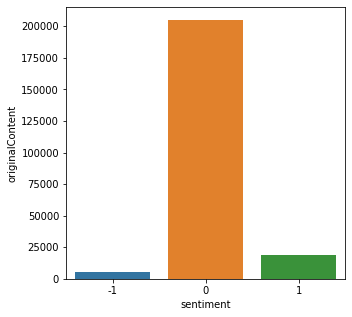

In [84]:
a = df.groupby('sentiment').count().sort_values(by='originalContent', ascending=False)
a = a.reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sns.barplot(x="sentiment", y="originalContent",data=a)

### cộng đồng Fireant hoạt động mạnh từ 2020 (số lượng cmt tăng từ gần như 0 lên 3000 cmt / ngày)

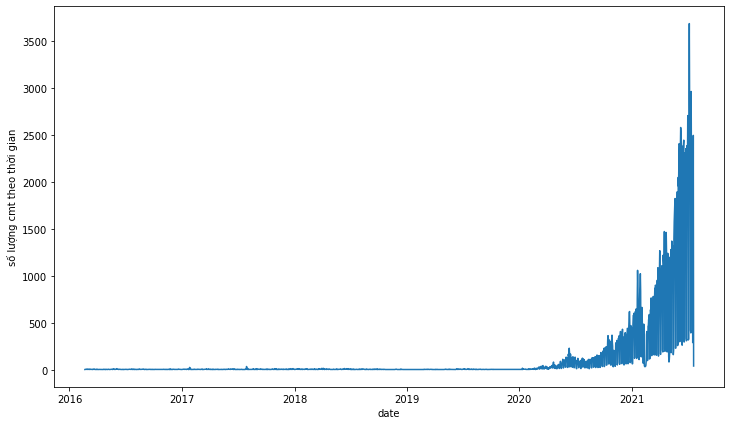

In [67]:
df1 = df
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.groupby('date').count().sort_values(by='date', ascending=False)
df1 = df1.reset_index()
df1['số lượng cmt theo thời gian'] = df1['originalContent']
df1 = df1.drop(['originalContent','link','sentiment','totalLikes','totalReplies','totalShares','taggedSymbols','user.name'],axis = 1)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
sns.lineplot(x="date", y="số lượng cmt theo thời gian",data=df1)

### Top 20 KOL trên Fireant (tính bằng cách đếm total like của từng user)

In [75]:
df2 = df
df2 = df2.drop(['originalContent','date','link','sentiment','totalReplies','totalShares','taggedSymbols'],axis = 1)
df2.groupby('user.name').sum().sort_values(by='totalLikes', ascending=False).head(20)

,totalLikes
user.name,
Tùng Nguyễn,10838
Mắt Diều Hâu,10725
F3️⃣1️⃣9️⃣,9067
Trangnt2,8210
OMNIS,7470
George Soros - GSFC,6628
Swing Trader,5474
Luu Quan An,4569
Deal Cafe,4082
